In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings ignore
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load data
data = pd.read_csv('../data/Crop_recommendation.csv')

# Show top 5 rows
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
# Info and stats
print("Shape of dataset:", data.shape)
print("\nData types:\n")
print(data.dtypes)

print("\nMissing values:\n")
print(data.isnull().sum())

print("\nBasic Statistics:\n")
print(data.describe())


Shape of dataset: (2200, 8)

Data types:

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Missing values:

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Basic Statistics:

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.5616

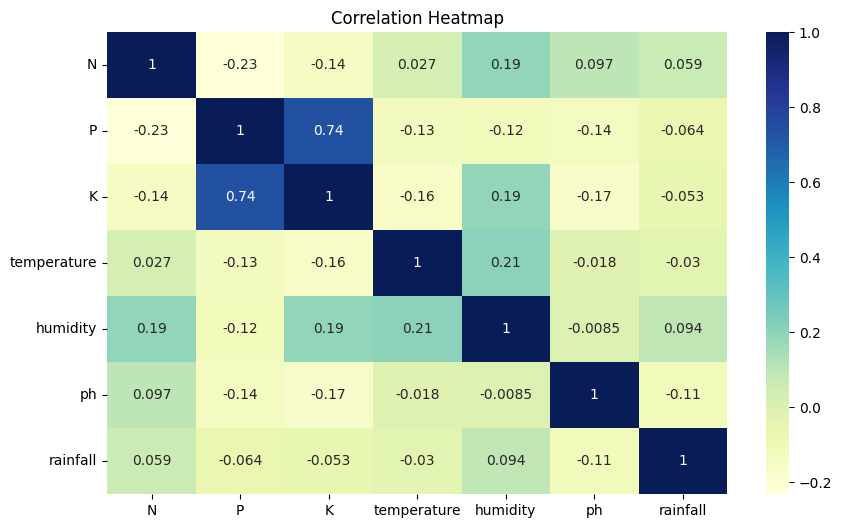

In [6]:
# Drop non-numeric column (like 'label' or 'crop') before correlation
numeric_data = data.drop('label', axis=1)  

plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
from sklearn.model_selection import train_test_split

# Features and target
X = data.drop('label', axis=1)    # Replace 'label' with 'crop' if needed
y = data['label']                 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Training Set:", X_train.shape)
print("✅ Testing Set:", X_test.shape)


✅ Training Set: (1760, 7)
✅ Testing Set: (440, 7)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# Evaluation
print("🎯 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))


🎯 Accuracy: 0.9931818181818182

📋 Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00

In [9]:

sample_input = np.array([[90, 42, 43, 20.5, 82.0, 6.5, 200.0]])  # N, P, K, temp, humidity, pH, rainfall

# Predict crop
predicted_crop = model.predict(sample_input)

print("✅ Recommended Crop:", predicted_crop[0])


✅ Recommended Crop: rice


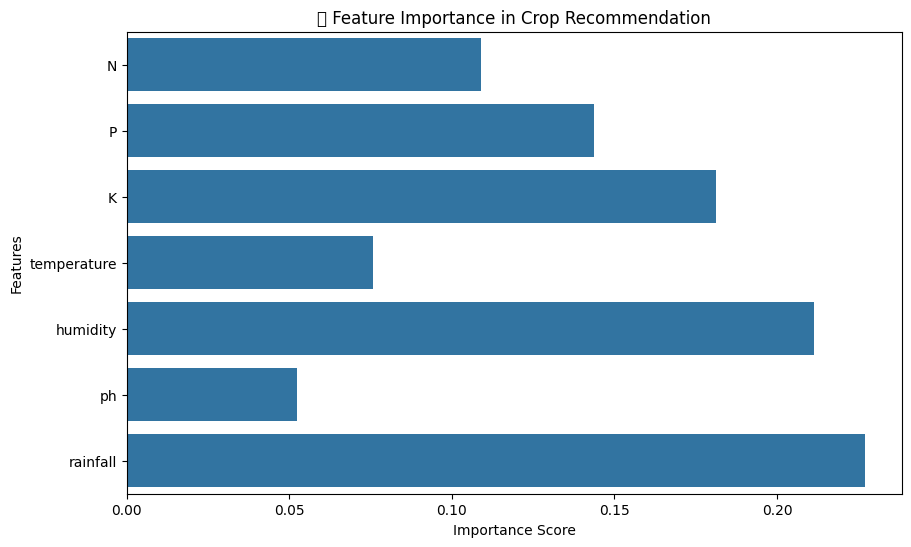

In [10]:
importances = model.feature_importances_
feature_names = X.columns

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=feature_names)
plt.title("🌾 Feature Importance in Crop Recommendation")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'crop_recommendation_model.pkl')

print("✅ Model saved as crop_recommendation_model.pkl")


✅ Model saved as crop_recommendation_model.pkl
